In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [52]:
df=pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv',index_col='Serial No.')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [53]:
y=df['Chance of Admit ']
x=df.drop('Chance of Admit ',axis=1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1
497,337,117,5,5.0,5.0,9.87,1
498,330,120,5,4.5,5.0,9.56,1


In [54]:
#reducing the two dimensional 
pca=PCA(n_components=2)
pca.fit(x)
x_pca=pca.transform(x)
x_pca=pd.DataFrame(x_pca,columns=['PCA1','PCA2'])
x_pca

,PCA1,PCA2
0,-23.273887,-0.783279
1,-6.811715,3.351076
2,1.841991,2.687708
3,-6.140811,-0.024660
4,4.212021,2.824404
...,...,...
495,-14.484897,5.912684
496,-22.957009,-0.008506
497,-17.942750,-5.731901
498,5.690921,1.610405


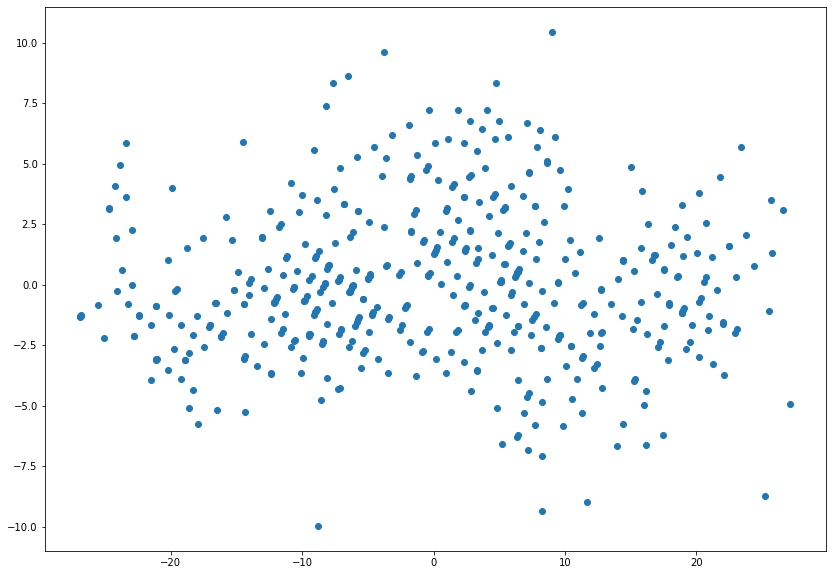

In [55]:
#ploting the data with PCA features
plt.figure(figsize=(14,10))
plt.scatter(x_pca['PCA1'],x_pca['PCA2'])
plt.show()

In [56]:
#getting information about PCA min and PCa max
PCA_max=np.argmax(x_pca['PCA1'])
PCA_min=np.argmin(x_pca['PCA1'])
print(PCA_min)
print(PCA_max)

202
377


In [57]:
x.iloc[PCA_max,:]

GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 378, dtype: float64

In [58]:
x.iloc[PCA_min,:]

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Name: 203, dtype: float64

In [59]:
#Scaling the data between 0 and 1
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [60]:
#spliting the data train set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [61]:
#training the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [62]:
#getting the accurary of the model
model.score(x_test,y_test)

0.8814334338972287

In [63]:
#predicting the vale for test datsaset
pred=model.predict(x_test)

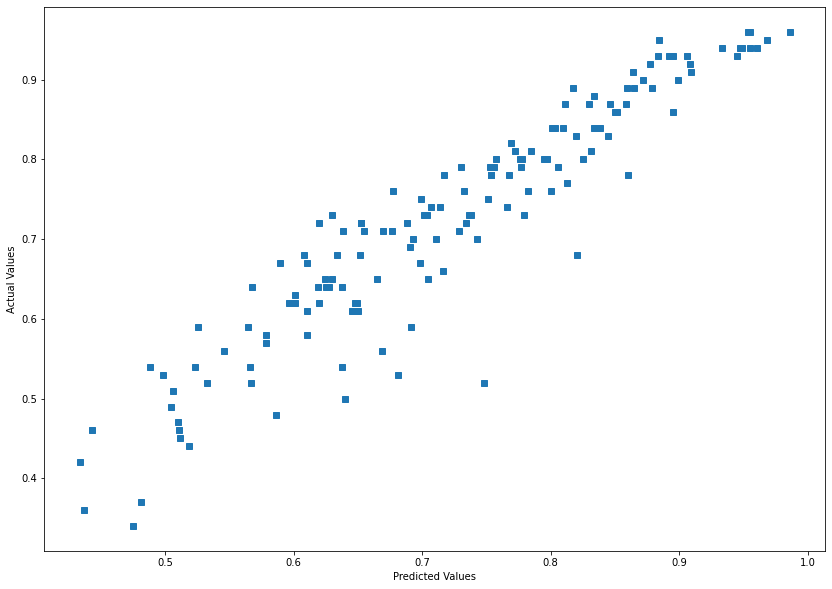

In [64]:
#ploting scatter plot between actual value to predicted value
plt.figure(figsize=(14,10))
plt.plot(pred,y_test,'s')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()